## 서울 생활이동 데이터 분석 (1)

### - 분석 과제

#### 서울시 생활이동 데이터란?
언제 어디서 어디로 얼마나 이동하였는지, 소요시간은 얼마나 걸렸는지에 대한 데이터

※ 동네산책과 같이 특정지점에서 체류시간이 짧은 이동 및 매우 가까운 근거리 이동은 제외

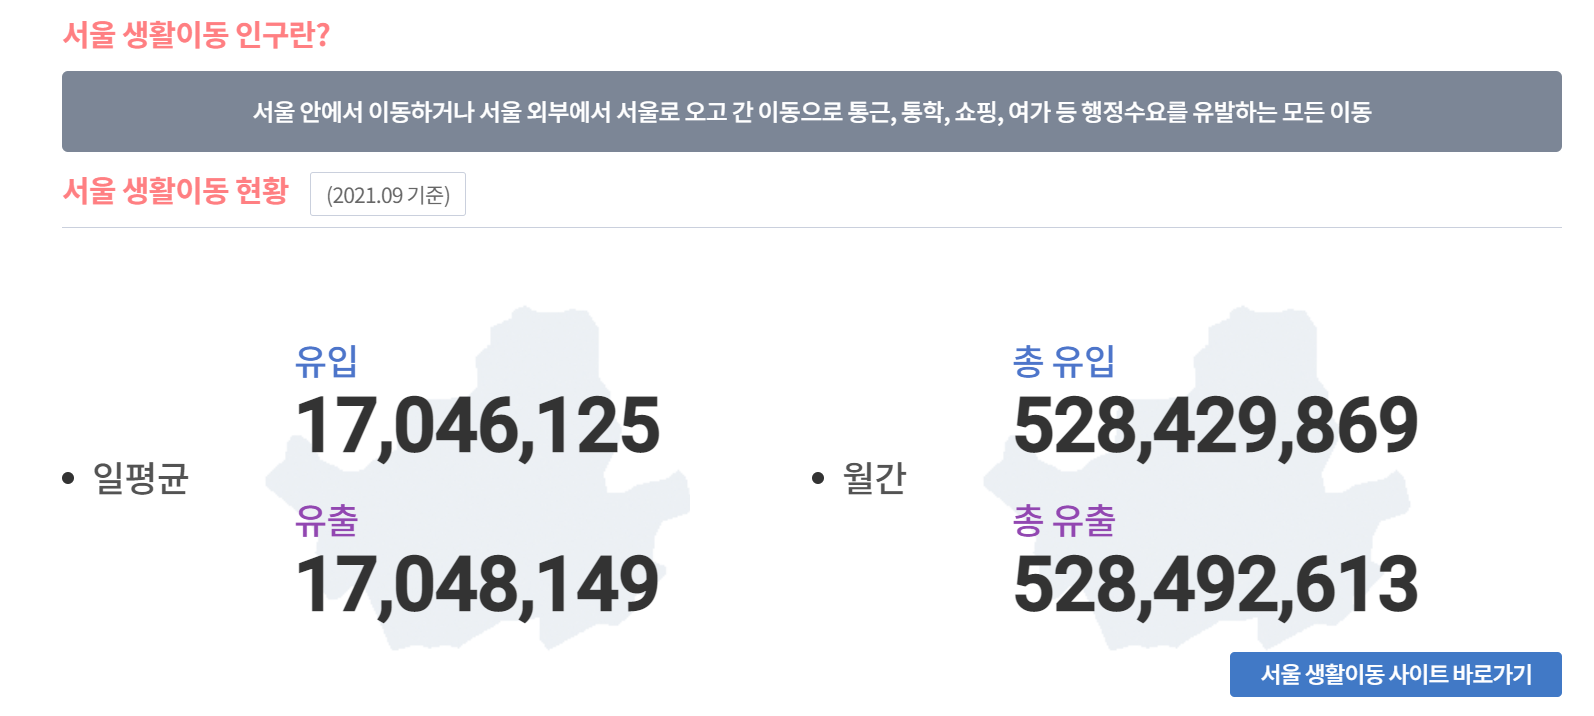

### - 데이터 설명

데이터에 적혀있는 항목은 아래와 같이 구성되어 있음

- 대상연월 : 데이터의 기록 날짜
- 요일 : 요일
- 도착 시간 : 도착 시군구 코드에 도착한 시간
- 출발 시군구 코드 : 추후에 서울시에서 제공한 시군구로 변환 (ex) 11010 -> "서울특별시 종로구")
- 도착 시군구 코드 : 추후에 서울시에서 제공한 시군구로 변환 (ex) 11010 -> "서울특별시 종로구")
- 성별
- 나이 : 5세 별로 끊어서 기록
- 이동유형 : H: 야간상주지, W: 주간상주지, E: 기타지역
- 평균 이동시간
- 이동인구 : KT의 휴대폰 데이터를 이용하여 한 개 이동의 출발지에서 도착지 간 이동한 인구수

In [1]:
import numpy as np
import pandas as pd
import re
import os

os.chdir(r"C:\\Users\\USER\Desktop\\Project\\Proceed\\Seoul_population_movement\\생활이동_자치구_202109")

In [2]:
ex_data = pd.read_csv("sep_mov_01.csv", encoding='cp949')

In [3]:
ex_data.head(10)

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202109,일,1,11060,31230,M,60,EE,80,3.5
1,202109,일,1,11220,26000,M,35,EE,120,*
2,202109,일,1,11050,31120,F,20,EE,10,*
3,202109,일,1,11250,11240,M,60,HE,40,10.52
4,202109,일,1,11230,11110,F,15,EE,50,4.11
5,202109,일,1,11190,11190,F,20,WW,20,42.34
6,202109,일,1,11230,11050,M,55,WH,10,16.49
7,202109,일,1,11010,11040,M,25,EH,30,4.51
8,202109,일,1,11110,21000,F,35,HE,90,3.03
9,202109,일,1,31060,11180,F,25,HE,10,*


### - 데이터 전처리

#### 1. 시간별 데이터를 하나의 데이터로 합치기

In [4]:
# upload data
for i in range(1,25):
    if i < 10:
        globals()['data_{}'.format(i)] = pd.read_csv("sep_mov_0"+str(i)+".csv", encoding="cp949")
    if i>=10:
        globals()['data_{}'.format(i)] = pd.read_csv("sep_mov_"+str(i)+".csv", encoding="cp949")

In [5]:
## 데이터 합치기
data = pd.concat([data_1, data_2, data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_11,data_12])
temp = pd.concat([data_13,data_14,data_15,data_16,data_17,data_18,data_19,data_20,data_21,data_22,data_23,data_24])
data = pd.concat([data,temp])
temp = None

In [6]:
## 통합 데이터 저장
# chdir 변경
os.chdir(r"C:\\Users\\USER\\Desktop\\Project\\Proceed\\Seoul_population_movement")

data.to_csv("origin_sep_movement.csv", encoding='utf-8')

#### 2. 출발시군, 도착시군 코드를 실제 지역으로 변환

In [7]:
# 구 코드
gu_code = pd.read_excel("replace_code.xlsx")

gu_code.head(10)

,시도,시군구,name,full name
0,11000,11010,종로구,서울특별시 종로구
1,11000,11020,중구,서울특별시 중구
2,11000,11030,용산구,서울특별시 용산구
3,11000,11040,성동구,서울특별시 성동구
4,11000,11050,광진구,서울특별시 광진구
5,11000,11060,동대문구,서울특별시 동대문구
6,11000,11070,중랑구,서울특별시 중랑구
7,11000,11080,성북구,서울특별시 성북구
8,11000,11090,강북구,서울특별시 강북구
9,11000,11100,도봉구,서울특별시 도봉구


In [8]:
for i in range(0,len(gu_code)):
    data['출발 시군구 코드'] = data['출발 시군구 코드'].replace(gu_code['시군구'][i], gu_code['full name'][i])
    data['도착 시군구 코드'] = data['도착 시군구 코드'].replace(gu_code['시군구'][i], gu_code['full name'][i])

#### 3. WH, HW를 출퇴근으로 변경,그 외 모두 이동으로 변환

In [9]:
data['이동유형'] = data['이동유형'].replace('WH', '출퇴근')
data['이동유형'] = data['이동유형'].replace('HW', '출퇴근')
data['이동유형'] = [re.sub('[A-Za-z]','이동',s) for s in data['이동유형']]
data['이동유형'] = data['이동유형'].replace('이동이동', '이동')

#### 4. 이동인구(합)의 *를 알수없음으로 변경

In [10]:
data['이동인구(합)'] = data['이동인구(합)'].replace('*', '알수없음')

#### 5. 컬럼명을 변경

In [11]:
data.columns = ['날짜','요일','도착한 시간','출발지','도착지','성별','나이','이동유형','이동 시간(분)', '이동인구']

#### 6. 저장

In [12]:
data.to_csv("seoul_sep_movement.csv", index=None)